In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

file = open("/home/andres/repos/rat-mapping-paper/reports/C_SMA_LAR/combine.pkl","rb")
combinations = pickle.load(file)


In [2]:
def threshold_array(pos):
    my_dict = {
    (key[0], key[2], key[3]): value["a"].mean() for  key,value in combinations.items() if key[1] == pos
    }
    keys, values = zip(*my_dict.items())
    print (keys)
    axis0 = np.unique([key[0] for key in keys])
    size = np.unique([key[2] for key in keys])
    axis1 = ["Deltoid", "Biceps", "Triceps", "ECR", "FCR", "ADM"][::-1]
    small = np.zeros((len(axis0), len(axis1)))
    large = np.zeros((len(axis0), len(axis1)))
    for key, value in zip(keys, values):
        if key[1] == "S":
            small[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[2][1:])[0]] = 1/value 
        elif key[1] == "B":
            large[np.where(axis0 == key[0])[0], np.where(np.array(axis1) == key[2][1:])[0]] = 1/value 
    return(small, large, axis0, axis1)

In [3]:
combinations.keys()

dict_keys([('amap01', 'C5M-C5LL', 'B', 'LADM'), ('amap01', 'C5M-C5LL', 'B', 'LBiceps'), ('amap01', 'C5M-C5LL', 'B', 'LDeltoid'), ('amap01', 'C5M-C5LL', 'B', 'LECR'), ('amap01', 'C5M-C5LL', 'B', 'LFCR'), ('amap01', 'C5M-C5LL', 'B', 'LTriceps'), ('amap01', '-C5LL', 'B', 'LADM'), ('amap01', '-C5LL', 'B', 'LBiceps'), ('amap01', '-C5LL', 'B', 'LDeltoid'), ('amap01', '-C5LL', 'B', 'LECR'), ('amap01', '-C5LL', 'B', 'LFCR'), ('amap01', '-C5LL', 'B', 'LTriceps'), ('amap01', 'C5M-C5LM', 'B', 'LADM'), ('amap01', 'C5M-C5LM', 'B', 'LBiceps'), ('amap01', 'C5M-C5LM', 'B', 'LDeltoid'), ('amap01', 'C5M-C5LM', 'B', 'LECR'), ('amap01', 'C5M-C5LM', 'B', 'LFCR'), ('amap01', 'C5M-C5LM', 'B', 'LTriceps'), ('amap01', '-C5M', 'B', 'LADM'), ('amap01', '-C5M', 'B', 'LBiceps'), ('amap01', '-C5M', 'B', 'LDeltoid'), ('amap01', '-C5M', 'B', 'LECR'), ('amap01', '-C5M', 'B', 'LFCR'), ('amap01', '-C5M', 'B', 'LTriceps'), ('amap01', '-C5LM', 'B', 'LADM'), ('amap01', '-C5LM', 'B', 'LBiceps'), ('amap01', '-C5LM', 'B', 'LD

In [4]:
len(combinations.keys()) / 6

403.0

In [ ]:
[(c[0], c[1], c[2]) for c in  combinations ]

In [5]:
def graph_arr(pos, size):
    small, large, subject, muscle = threshold_array(pos)
    sub_meanS = np.median(small, axis=0)
    rowS = np.vsplit(small,len(subject))
    rowS = [i.tolist() for i in rowS]
    sub_meanL = np.median(large, axis=0)
    rowL = np.vsplit(large,len(subject))
    rowL = [i.tolist() for i in rowL]
    if size == "S":
        for xval in rowS:
            plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3)
            plt.plot(sub_meanS,muscle, color = "black", linestyle='dashed', marker=".", markersize=20)
        plt.yticks(weight ='bold',style = 'italic')
        plt.xlabel('Efficacy')
        plt.show()
    if size == "B":
        for xval in rowL:
            plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3)
            plt.plot(sub_meanL,muscle, color = "black", linestyle='dashed', marker=".", markersize=20)
        plt.yticks(weight ='bold',style = 'italic')
        plt.xlabel('Efficacy')
        plt.show()
    if size == "Both":
        for xval in rowS:
            # plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=20, alpha =0.3, color = "pink")
            plt.plot(sub_meanS,muscle, color = "red", linestyle='dashed', marker=".", markersize=20)
        for xval in rowL:
            # plt.plot(xval[0], muscle, linestyle='dashed', marker=".", markersize=25, alpha =0.3, color = "blue")
            plt.plot(sub_meanL,muscle, color = "black", linestyle='dashed', marker=".", markersize=25)
        plt.yticks(weight ='bold',style = 'italic')
        plt.xlabel('Efficacy')
        plt.show()
    

In [6]:
df = pd.read_csv("/home/andres/data/hbmep-processed/C_SMA_LAR/data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/andres/data/hbmep-processed/C_SMA_LAR/data.csv'

(('amap01', 'B', 'LADM'), ('amap01', 'B', 'LBiceps'), ('amap01', 'B', 'LDeltoid'), ('amap01', 'B', 'LECR'), ('amap01', 'B', 'LFCR'), ('amap01', 'B', 'LTriceps'), ('amap02', 'B', 'LADM'), ('amap02', 'B', 'LBiceps'), ('amap02', 'B', 'LDeltoid'), ('amap02', 'B', 'LECR'), ('amap02', 'B', 'LFCR'), ('amap02', 'B', 'LTriceps'), ('amap03', 'B', 'LADM'), ('amap03', 'B', 'LBiceps'), ('amap03', 'B', 'LDeltoid'), ('amap03', 'B', 'LECR'), ('amap03', 'B', 'LFCR'), ('amap03', 'B', 'LTriceps'), ('amap03', 'S', 'LADM'), ('amap03', 'S', 'LBiceps'), ('amap03', 'S', 'LDeltoid'), ('amap03', 'S', 'LECR'), ('amap03', 'S', 'LFCR'), ('amap03', 'S', 'LTriceps'), ('amap04', 'B', 'LADM'), ('amap04', 'B', 'LBiceps'), ('amap04', 'B', 'LDeltoid'), ('amap04', 'B', 'LECR'), ('amap04', 'B', 'LFCR'), ('amap04', 'B', 'LTriceps'), ('amap04', 'S', 'LADM'), ('amap04', 'S', 'LBiceps'), ('amap04', 'S', 'LDeltoid'), ('amap04', 'S', 'LECR'), ('amap04', 'S', 'LFCR'), ('amap04', 'S', 'LTriceps'), ('amap05', 'B', 'LADM'), ('amap05

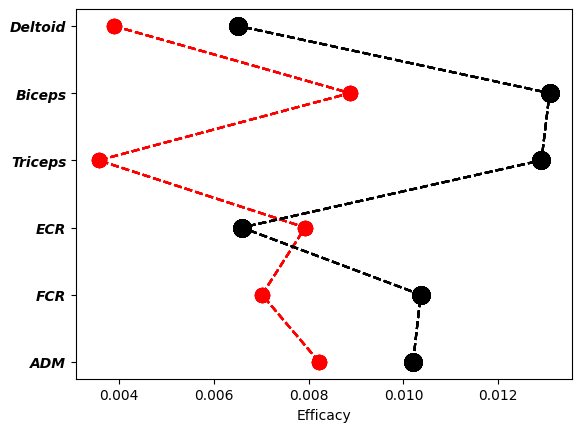

In [7]:
graph_arr("-C6M","Both")

In [74]:
c = "C5M-C5LL"

before, after = c.split("-")

after[2:]

'LL'

In [20]:
cpos = df["compound_position"].unique()
target = [c for c in cpos if c.split("-")[0][2:] == "M" and c.split("-")[1][2:] == "LL"]
result = []
for key in combinations.keys():
    if key[2] =="B" and key[1] in target:
        result.append(key)




In [21]:
M_L = [c for c in cpos if c.split("-")[0][2:] == "M" and c.split("-")[1][2:] == "L"]
M_LL = [c for c in cpos if c.split("-")[0][2:] == "M" and c.split("-")[1][2:] == "LL"]
M_LM = [c for c in cpos if c.split("-")[0][2:] == "M" and c.split("-")[1][2:] == "LM"]

print("M_L", M_L)
print("M_LL", M_LL)
print("M_LM", M_LM)


M_L ['C5M-C5L', 'C5M-C6L', 'C6M-C6L']
M_LL ['C5M-C5LL', 'C5M-C6LL', 'C6M-C6LL']
M_LM ['C5M-C5LM', 'C6M-C6LM']


In [22]:
sub_M_L = [c[0] for c in combinations if c[1] in M_L and c[2] == "B"]
sub_M_L = list(set(sub_M_L))

sub_M_L

['amap03', 'amap07', 'amap02', 'amap08', 'amap01']

In [14]:
combinations_no_response = [(c[0], c[1], c[2]) for c in combinations]
combinations_no_response = list(set(combinations_no_response))
len(combinations_no_response)

def get_valid_combinations(left, right, size):
    return [
        c for c in combinations_no_response
        if c[1].split("-")[0][2:] == left and c[1].split("-")[1][2:] == right and c[2] == size
    ]

M_LL = get_valid_combinations("M", "LL", "B")
M_L = get_valid_combinations("M", "L", "B")
 

print("M_L", len(M_L))
print("M_LL", len(M_LL))

M_L 8
M_LL 11


In [129]:
(M_L)


[('amap08', 'C5M-C5L', 'B'),
 ('amap03', 'C5M-C5L', 'B'),
 ('amap02', 'C5M-C5L', 'B'),
 ('amap01', 'C5M-C5L', 'B'),
 ('amap07', 'C6M-C6L', 'B'),
 ('amap08', 'C6M-C6L', 'B'),
 ('amap03', 'C6M-C6L', 'B'),
 ('amap07', 'C5M-C5L', 'B')]

In [8]:
def lat_arr (ps, pos, size):
     res = {}
     my_dict = {
     (key[0], key[1], key[2]): value[ps].mean() for  key,value in combinations.items()
     }
     musc = ["Deltoid", "Biceps", "Triceps", "ECR", "FCR", "ADM"][::-1]

     #get all possible positions
     loc = np.unique([key[1] for key in combinations.keys()])
     left = []
     right = [] 

     #for all positions, get the left and right of the "-" i.e. C5M-C5L will split to C5M and C5L
     for loca in loc:
          left.append(loca.split("-")[0][2:])
          right.append(loca.split("-")[1][2:])
     #looking at all L and R, look for subjects that have the combination in the original dictionary 
     #taking those valid combos, grab the values from my_dict and put it into a new dictionary
          for l, r in zip(left, right):
               posit = get_valid_combinations(l, r, size)
               for k, v in my_dict.items():
                    for s in posit:
                         if s[0] == k[0] and s[1] == k[1]:
                              res[s]=v
                              
     result = {}
     #taking all keys:values from res, remove the C and number then combine all same positions (regardless of level) into array with key position
     for key, value in res.items():
          # print(key)
          L = key[1].split("-")[0][2:]
          R = key[1].split("-")[1][2:]
          clean = L +"-"+ R     
          if clean in result:
               result[clean] = np.concatenate((result[clean], np.array([value])))
          else:
               result[clean] = np.array([value])

     kval = result.keys()
     print(kval)
     ttest_values = {}
     pscores = {}
     
     #t-test input position vs all others
     for kv,vv in result.items():
          # print(kv)
          ttest_values[kv], pscores[kv] = stats.ttest_ind(vv, result[pos])

     return res, result, ttest_values, pscores


In [9]:
#TEST BIG VS SMALL ELECTRODES

arr, big, bt, bpscore = lat_arr("a", "LL", "B")
arrs, small, ts, spscore = lat_arr("a", "LL", "S")

ttestbs = {}
pvalbs = {}

for k, v in big.items():
    if k in small.keys():
        ttestbs[k], pvalbs[k] = stats.ttest_ind(v, small[k], alternative="less")
    else:
        pass

NameError: name 'get_valid_combinations' is not defined

In [10]:
arr

NameError: name 'arr' is not defined

In [16]:
loc = np.unique([key[1] for key in combinations.keys()]) 
left = []
right = [] 
for loca in loc:
    left.append(loca.split("-")[0][2:])
    right.append(loca.split("-")[1][2:])
for l, r in zip(left, right):
    posit = get_valid_combinations(l, r, "B")

In [43]:
pvalbs

{'L': 0.01997814462314445,
 'LL': 0.3647820225461568,
 'M': 0.3469964633670054,
 'LLL': 0.1166968303739931,
 'ML': 0.05393879061797303,
 'MLL': 0.3702378993271338}

In [ ]:
means = {}
for k, r in big.items():
    means[k] = np.mean(r) 
print (means)